In [63]:
import pandas as pd
import time
import websocket
import json, pprint, talib 
import numpy
from binance.client import Client
from binance.enums import *

from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


api_key = 'ihvXWbHvvDrYuroIJOS9ANW6X7tv5OQSYibLLloKyIGui0w93Q5yUJOBZclnNL5D'
api_secret = 'uzmKBJ3lmVS4TsTl2AOHVJOYTFfLM5qrg00vAqUyTYbSjiy7BDPlTpaq2Oy7qdo2'

client = Client(api_key, api_secret)

#format (symbol, interval, 120 mins ago, now) or (symbol, interval, start date, end date) "1 Dec, 2017"
def getminutedata(symbol, interval, start, end):
    if(end == 'now'):
        frame = pd.DataFrame(client.get_historical_klines(symbol,
                                                        interval,
                                                        start + ' min ago UTC'))
    else:
        frame = pd.DataFrame(client.get_historical_klines(symbol, 
                                                        interval, 
                                                        start, 
                                                        end))
    frame = frame.iloc[:,:6]                                                    
    frame.columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume']
    frame = frame.set_index('Time')
    frame.index = pd.to_datetime(frame.index, unit= 'ms')
    frame = frame.astype(float)
    return frame

def get_trends_3(coin):
    pytrends = TrendReq(hl='en-GB')
    data = pytrends.get_historical_interest(coin, 
                                    year_start=2021, 
                                    month_start=11, 
                                    day_start=9, 
                                    hour_start=0, 
                                    year_end=2021, 
                                    month_end=11, 
                                    day_end=18, 
                                    hour_end=19, 
                                    cat=0, 
                                    geo='', 
                                    gprop='', 
                                    sleep=0)
    data = data.drop('isPartial', axis=1)
    return data

time = str(60*24*11)
CLOSE = getminutedata('LTOUSDT', '1m', time, 'now')['Close']
print(CLOSE)
HYPE = get_trends_3(['LTO network'])
print(HYPE)


Time
2021-11-07 23:25:00    0.2954
2021-11-07 23:26:00    0.2954
2021-11-07 23:27:00    0.2954
2021-11-07 23:28:00    0.2955
2021-11-07 23:29:00    0.2962
2021-11-07 23:30:00    0.2962
2021-11-07 23:31:00    0.2959
2021-11-07 23:32:00    0.2953
2021-11-07 23:33:00    0.2953
2021-11-07 23:34:00    0.2957
2021-11-07 23:35:00    0.2957
2021-11-07 23:36:00    0.2956
2021-11-07 23:37:00    0.2956
2021-11-07 23:38:00    0.2958
2021-11-07 23:39:00    0.2958
2021-11-07 23:40:00    0.2958
2021-11-07 23:41:00    0.2957
2021-11-07 23:42:00    0.2955
2021-11-07 23:43:00    0.2958
2021-11-07 23:44:00    0.2961
2021-11-07 23:45:00    0.2962
2021-11-07 23:46:00    0.2962
2021-11-07 23:47:00    0.2964
2021-11-07 23:48:00    0.2963
2021-11-07 23:49:00    0.2963
2021-11-07 23:50:00    0.2960
2021-11-07 23:51:00    0.2963
2021-11-07 23:52:00    0.2968
2021-11-07 23:53:00    0.2975
2021-11-07 23:54:00    0.2976
2021-11-07 23:55:00    0.2977
2021-11-07 23:56:00    0.2974
2021-11-07 23:57:00    0.2976
2021-

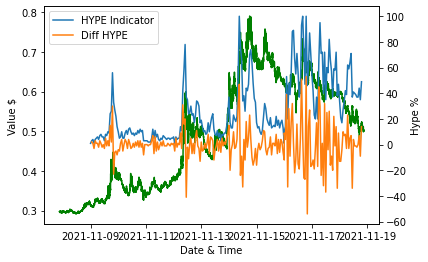

In [16]:
plt.figure()

plt.plot(CLOSE, color="green")
plt.xlabel("Date & Time")
plt.ylabel("Value $")

plt2=plt.twinx()
plt2.plot(HYPE)
plt2.plot(HYPE.diff(periods=1))
plt2.set_ylabel("Hype %")
plt2.legend(['Close price'])
plt.legend(['HYPE Indicator', 'Diff HYPE'])

plt.show()

In [65]:
pd.set_option("display.max_rows", None)

HYPE['diff'] = HYPE.diff(periods=1)
#data_top = HIndicator.head()
#data_top


HYPE['Buy'] = (HYPE['diff'] > 20)

HYPE['Sell'] = (HYPE['diff'] < 0)

HYPE['Close'] = CLOSE

HYPE['Upward'] = HYPE['Close'].diff(periods=2)



HYPE


,LTO network,diff,Buy,Sell,Close,Upward
date,,,,,,
2021-11-09 00:00:00,2,NaN,False,False,0.3140,NaN
2021-11-09 01:00:00,3,1,False,False,0.3104,NaN
2021-11-09 02:00:00,4,1,False,False,0.3105,-0.0035
2021-11-09 03:00:00,2,-2,False,True,0.3157,0.0053
2021-11-09 04:00:00,3,1,False,False,0.3252,0.0147
2021-11-09 05:00:00,5,2,False,False,0.3291,0.0134
2021-11-09 06:00:00,5,0,False,False,0.3310,0.0058
2021-11-09 07:00:00,4,-1,False,True,0.3245,-0.0046
2021-11-09 08:00:00,7,3,False,False,0.3195,-0.0115


In [67]:
nHype = HYPE.to_numpy()
holding = False
buyprice = 0
sellprice = 0
tradeBuy = []
tradeSell = []
for row in range(len(nHype)):
    if ( (holding == False) and (nHype[row][1] > 5) and (nHype[row][5] >= 0) ):
        buyprice = nHype[row][4]
        holding = True

    if (holding == True and nHype[row][3] == True):
        sellprice = nHype[row][4]
        tradeBuy.append(buyprice)
        tradeSell.append(sellprice)
        holding = False

tradeDiff = []
tradePerc = []

for x in range(len(tradeBuy)-1):
    tradeDiff.append(tradeSell[x] - tradeBuy[x])
    tradePerc.append(tradeSell[x]/tradeBuy[x])

tradeReturn = 1
for x in tradePerc:
    tradeReturn *= x

print(tradeDiff)

print(tradePerc)

print('Return = ' + str(tradeReturn))

print('Hold = ' + str(HYPE['Close'][-1]/HYPE['Close'][0]) )



[0.07269999999999999, -0.0014000000000000123, 0.02739999999999998, 0.11520000000000002, 0.008100000000000052, 0.004999999999999949, 0.004799999999999971, 0.03410000000000002, 0.0484, 0.10250000000000004, -0.0504, 0.05190000000000006, 0.02949999999999997, 0.05989999999999995, 0.007699999999999929, -0.030299999999999994, 0.019000000000000017, -0.012199999999999989, -0.0034999999999999476]
[1.1973934292696171, 0.9962274319590406, 1.0696315120711561, 1.2765242438790207, 1.0162487462387162, 1.0100502512562812, 1.0097382836275106, 1.0610673352435531, 1.0827350427350428, 1.1610369206598588, 0.9360406091370559, 1.0763459841129746, 1.048139686684073, 1.0930557713220443, 1.0116666666666665, 0.9520569620253164, 1.0317832050853128, 0.9803416048984853, 0.9941176470588237]
Return = 2.5172928143003572
Hold = 1.6560509554140128


In [4]:
import pandas as pd
from pytrends.request import TrendReq as UTrendReq
GET_METHOD='get'
import requests

headers = {
    'authority': 'trends.google.com',
    'sec-ch-ua': '"Chromium";v="94", " Not A;Brand";v="99", "Opera";v="80"',
    'accept': 'application/json, text/plain, */*',
    'sec-ch-ua-mobile': '?0',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36 OPR/80.0.4170.63',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'cors',
    'sec-fetch-dest': 'empty',
    'referer': 'https://trends.google.com/trends/explore?q=mirror%20protocol',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    'cookie': '__utmc=10102256; __utma=10102256.830189433.1636580671.1637612468.1637615437.6; __utmz=10102256.1637615437.6.4.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utmt=1; __utmb=10102256.9.9.1637615792660; CONSENT=YES+GB.en-GB+V9+BX; SEARCH_SAMESITE=CgQImZMB; HSID=A0PbYKwoJWHkP2cLJ; SSID=ATw-D_CgCgaCnOMxq; APISID=hng8MXyBWur_w5fC/AurWCgPbsYDEtwkWm; SAPISID=vSGlu5opiC_3-Dav/Ak0loYtHrjyKusKXH; __Secure-1PAPISID=vSGlu5opiC_3-Dav/Ak0loYtHrjyKusKXH; __Secure-3PAPISID=vSGlu5opiC_3-Dav/Ak0loYtHrjyKusKXH; OGPC=19025836-2:; __Secure-1PSIDCC=AJi4QfHJF0V84yFFydIeqwcTavYgTxPKZTm4r-j92P2vuN691-chSFUrnLeYq4ccPLlok1ebJg; SID=EAgztJro1wlVbGdfzKYVqqxGYz9eHXx7y-0pWf9ljDCqShG7I4iq_DUrjYYzifOFgAkPdg.; __Secure-1PSID=EAgztJro1wlVbGdfzKYVqqxGYz9eHXx7y-0pWf9ljDCqShG7Arm0dTwN1pVkMU_W42hVkA.; __Secure-3PSID=EAgztJro1wlVbGdfzKYVqqxGYz9eHXx7y-0pWf9ljDCqShG7J8Mh2faUlqm65EfZ7UsPCQ.; NID=511=esdr8y2puX552h2JBc-TknP1obzsr3qLgSA0yeAV7DnfwAVYC251PzaCr4yYLsm0EyMjI7L7neOP6JTtPSHjnHgitlzfoWrzX7xcm8n8hB6wIeLNCMeECr-IhEQs3-ocHCofs6pbgR6LwfrvhIvF9WCClueXUX4FKGD3CQ14xkM9ikLu44rqvJjgYtyXfcwcFl3qpWZOKGfuY4Jz_Molfk7bNBlNNaNUe0CeMlei3I4dIkHbEBlAA6LW8vFhnIZyMWhCd2lVkAiy0c_FOaUUp7iCKPUj6RD-ddXs7X_j7X5-2DRkXkUZI5Cl8d-ZyyPWDGcnOtvPGwBiTGQ8o7tRxRMRMjjR_cnrR9TyMUIdYJ7F7cJmTl9GUqgZ-spxHWzUU0hlgmrdLErIBsTdXA; 1P_JAR=2021-11-22-21; SIDCC=AJi4QfHp9yLbArD3EA6819JHREwwDTB9vLz-bkPMpDjk7VY2Zh26Zb4JTNu7jl3FkmbY6CEZeL18; __Secure-3PSIDCC=AJi4QfEct8ZkJckjPrd7cpR-xm748VcgUsitncJ7DEkOKMdTbMOZSwaZbCxEyvinm2nCvqQ-3rQ3',
}
GET_METHOD='get'
class TrendReq(UTrendReq):
    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




def get_trends_3(coin):
    pytrends = TrendReq(hl='en-GB')
    data = pytrends.get_historical_interest(coin, 
                                    year_start=2021, 
                                    month_start=11, 
                                    day_start=13, 
                                    hour_start=0, 
                                    year_end=2021, 
                                    month_end=11, 
                                    day_end=22, 
                                    hour_end=23, 
                                    cat=0, 
                                    geo='', 
                                    gprop='', 
                                    sleep=0)
    if 'isPartial' in data:
        data = data.drop('isPartial', axis=1)
    return data

#pytrends = TrendReq(hl='en-US', tz='', timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})
#pytrends = TrendReq(hl='en-GB', tz=0, timeout=(10,25))

HYPE = get_trends_3(['MINA'])

print(HYPE)
data = HYPE.drop('isPartial', axis=1)
#print(data)
plt.figure()
#print(all_keywords[kw])
plt.plot(data)
plt.plot(data.rolling(10).mean())
plt.xlabel("Date & Time")
plt.ylabel("Interest")
plt.show(block=False)

                     MINA
date                     
2021-11-13 00:00:00    73
2021-11-13 01:00:00    72
2021-11-13 02:00:00    65
2021-11-13 03:00:00    64
2021-11-13 04:00:00    63
...                   ...
2021-11-22 17:00:00    92
2021-11-22 18:00:00    89
2021-11-22 19:00:00    89
2021-11-22 20:00:00    95
2021-11-22 21:00:00   100

[239 rows x 1 columns]


KeyError: "['isPartial'] not found in axis"

In [3]:
print(HYPE)

                     M   i  n   a
date                             
2021-11-13 00:00:00  3  21  3  84
2021-11-13 01:00:00  3  20  3  81
2021-11-13 02:00:00  3  21  3  77
2021-11-13 03:00:00  3  20  3  71
2021-11-13 04:00:00  3  20  3  67
...                 ..  .. ..  ..
2021-11-22 17:00:00  3  20  2  72
2021-11-22 18:00:00  3  21  3  76
2021-11-22 19:00:00  3  20  3  80
2021-11-22 20:00:00  3  22  3  85
2021-11-22 21:00:00  3  22  3  84

[239 rows x 4 columns]
